# Scikit-Learn Introduction

[Scikit-Learn](http://scikit-learn.org) provides solid implementations of a range of machine learning algorithms, a python library that provides efficient versions of a large number of common algorithms.
Scikit-Learn is characterized by a clean, uniform, and streamlined application programming interface (API), as well as by very useful and complete online documentation.

This is an overview of the Scikit-Learn API. We will start by covering **Data Representation** in Scikit-Learn, followed by covering the **Estimator** API, and finally go through a more interesting example of using these tools for exploring a set of images of hand-written digits.

## Data Representation in Scikit-Learn

The best way to think about data within Scikit-Learn is in terms of tables of data.

### Data as table

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.
For example, consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).
We can load this dataset in the form of a Pandas ``DataFrame`` using the [Seaborn](http://seaborn.pydata.org/) library:

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset. In general, we will refer to the rows of the matrix as **samples**, and the number of rows as ``n_samples``.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample. In general, we will refer to the columns of the matrix as **features**, and the number of columns as ``n_features``.

#### Features matrix

The table can be viewed as a two-dimensional numerical array or matrix, called the **features matrix**.
By convention, this features matrix is often stored in a variable named ``X``.
The features matrix is assumed to be two-dimensional, with shape ``[n_samples, n_features]``, and is most often contained in a NumPy array or a Pandas ``DataFrame``.

The samples (i.e., rows) always refer to the individual objects described by the dataset.
For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner. Features are generally real-valued, but may be Boolean or discrete-valued in some cases.

#### Target array

In addition to the feature matrix ``X``, we also generally work with a **label** or **target** array, which by convention we will usually call ``y``.
The target array is usually one dimensional, with length ``n_samples``, and is generally contained in a **NumPy array** or **Pandas ``Series``**.
The target array may have continuous numerical values, or discrete classes/labels.
While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, ``[n_samples, n_targets]`` target array, we will primarily be working with the common case of a one-dimensional target array.

Target array is the quantity we want to **predict from the data**: in statistical terms, it is the dependent variable. For example, we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the ``species`` column would be considered the target array.

We can use Seaborn to conveniently visualize the data:

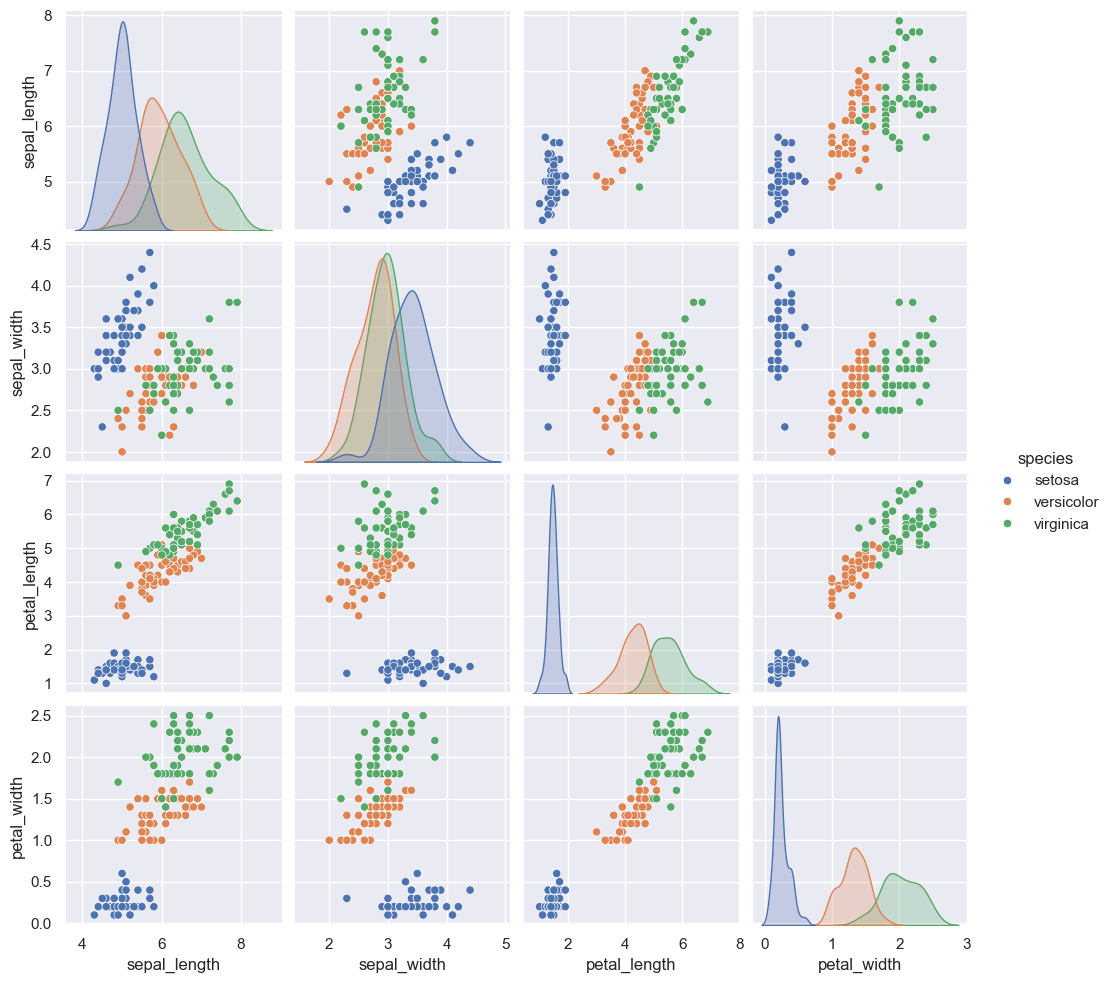

In [2]:
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species');

We extract the features matrix and target array from the ``DataFrame``, which we can do using some of the Pandas ``DataFrame`` operations.

In [3]:
X_iris = iris.drop('species',axis = 1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

In [5]:
y_iris

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

To summarize, the expected layout of features and target values is visualized in the following diagram:

<img src='../figs/05_data.png'>

## Scikit-Learn's Estimator API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.

2. Choose model hyperparameters by instantiating this class with desired values.

3. Arrange data into a features matrix and target vector following the discussion above.

4. Fit the model to your (training) data by calling the ``fit()`` method of the model instance.

5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

### Supervised learning example: Simple linear regression

Let's consider a simple linear regression—that is, the common case of fitting a line to $(x, y)$ data.

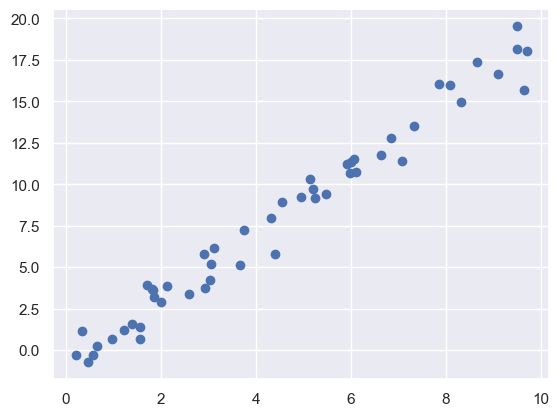

In [6]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

#### 1. Choose a class of model

In Scikit-Learn, **every class of model is represented by a Python class.**
For example, if we would like to compute a simple linear regression model, we can import the linear regression class: [module documentation](http://Scikit-Learn.org/stable/modules/linear_model.html)

In [7]:
from sklearn.linear_model import LinearRegression

#### 2. Choose model hyperparameters

An important point is that **a class of model is not the same as an instance of a model**.
In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.

For linear regression, we can instantiate the ``LinearRegression`` class and specify that we would like to fit the intercept using the ``fit_intercept`` hyperparameter:

In [8]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

**When the model is instantiated, the only action is the storing of these hyperparameter values.**
We have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between **choice of model** and **application of model to data**.

#### 3. Arrange data into a features matrix and target vector

The Scikit-Learn data representation requires a **two-dimensional features matrix** and a **one-dimensional target array**.
The target variable ``y`` is already in the correct form (a length-``n_samples`` array), but we need to convert the data ``x`` to make it a matrix of size ``[n_samples, n_features]``.

In [9]:
X = x[:, np.newaxis]
X.shape

(50, 1)

alternatively,

In [10]:
X = x.reshape(-1,1)
X.shape

(50, 1)

#### 4. Fit the model to your data

Now it is time to apply our model to data.
This can be done with the ``fit()`` method of the model:

In [11]:
model.fit(X, y)

LinearRegression()

This ``fit()`` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes.
In Scikit-Learn, all model parameters that were learned during the ``fit()`` process have trailing underscores; for example in this linear model, we have the following:

In [12]:
model.coef_

array([1.9776566])

In [13]:
model.intercept_

np.float64(-0.9033107255311164)

These two parameters represent the slope and intercept of the simple linear fit to the data.
Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters inclduing uncertanty is a **statistical modeling** question rather than a **machine learning** question.
Machine learning focuses on what the model **predicts**.
If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the [Statsmodels Python package](http://statsmodels.sourceforge.net/).

#### 5. Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the ``predict()`` method.

In [14]:
xfit = np.linspace(-1, 11)
xfit.shape

(50,)

As before, we need to coerce these *x* values into a ``[n_samples, n_features]`` features matrix, after which we can feed it to the model:

In [15]:
Xfit = xfit[:, np.newaxis]
# Xfit = xfit.reshape(-1,1)
yfit = model.predict(Xfit)

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

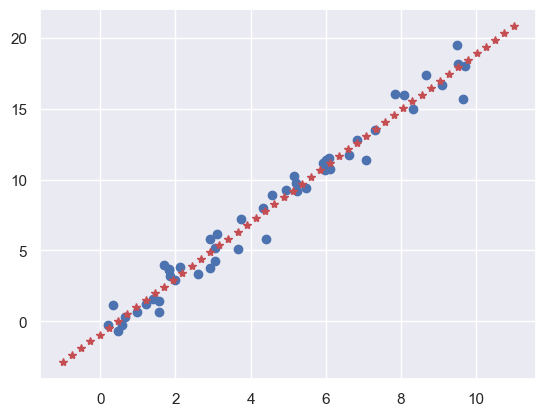

In [16]:
plt.scatter(x, y)
plt.plot(xfit, yfit, 'r*');

### Supervised learning example: Iris classification

Logistic regression on Iris dataset:

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

With the data arranged, we can follow our recipe to predict the labels:

In [18]:
from sklearn.linear_model import LogisticRegression # 1. choose model class

In [19]:
model = LogisticRegression(max_iter = 1000)                      # 2. instantiate model

In [20]:
model.fit(Xtrain, ytrain)                  # 3. fit model to data

LogisticRegression(max_iter=1000)

In [21]:
y_model = model.predict(Xtest)             # 4. predict on new data

Finally, we can use the ``accuracy_score`` utility to see the fraction of predicted labels that match their true value:

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Check training accuracy:

In [23]:
pred_train = model.predict(Xtrain)

In [24]:
accuracy_score(ytrain, pred_train)

0.9821428571428571

### Unsupervised learning example: Iris dimensionality

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it.
Recall that the Iris data is four dimensional: there are four features recorded for each sample.

Here we  use principal component analysis (PCA), which is a fast linear dimensionality reduction technique.
We will ask the model to return a two-dimensional representation of the data:

In [25]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

In [26]:
X_iris.shape

(150, 4)

In [27]:
X_2D.shape

(150, 2)

We plot the results. A quick way to do this is to insert the results into the original Iris ``DataFrame``, and use Seaborn's ``lmplot`` to show the results:

In [28]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


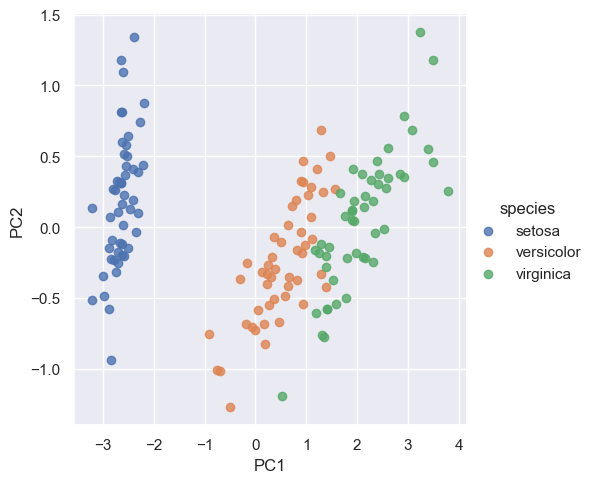

In [29]:
iris['PC1'] = X_2D[:, 0]
iris['PC2'] = X_2D[:, 1]
sns.lmplot(x = "PC1", y = "PC2", hue='species', data=iris, fit_reg=False);

In [30]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,PC1,PC2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628


We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels.
This indicates that a relatively straightforward classification will probably be effective on the dataset.

### Unsupervised learning: Iris clustering

Let's next look at applying clustering to the Iris data.
A clustering algorithm attempts to find distinct groups of data without reference to any labels.
Here we will use a powerful clustering method called a Gaussian mixture model (GMM).
A GMM attempts to model the data as a collection of Gaussian blobs.

We can fit the Gaussian mixture model as follows:

In [31]:
from sklearn.mixture import GaussianMixture       # 1. Choose the model class
model = GaussianMixture(n_components=3,
            covariance_type='full')               # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                                 # 3. Fit to data. Notice y is not specified.
y_gmm = model.predict(X_iris)                     # 4. Determine cluster labels

In [32]:
y_gmm

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

As before, we will add the cluster label to the Iris ``DataFrame`` and use Seaborn to plot the results:

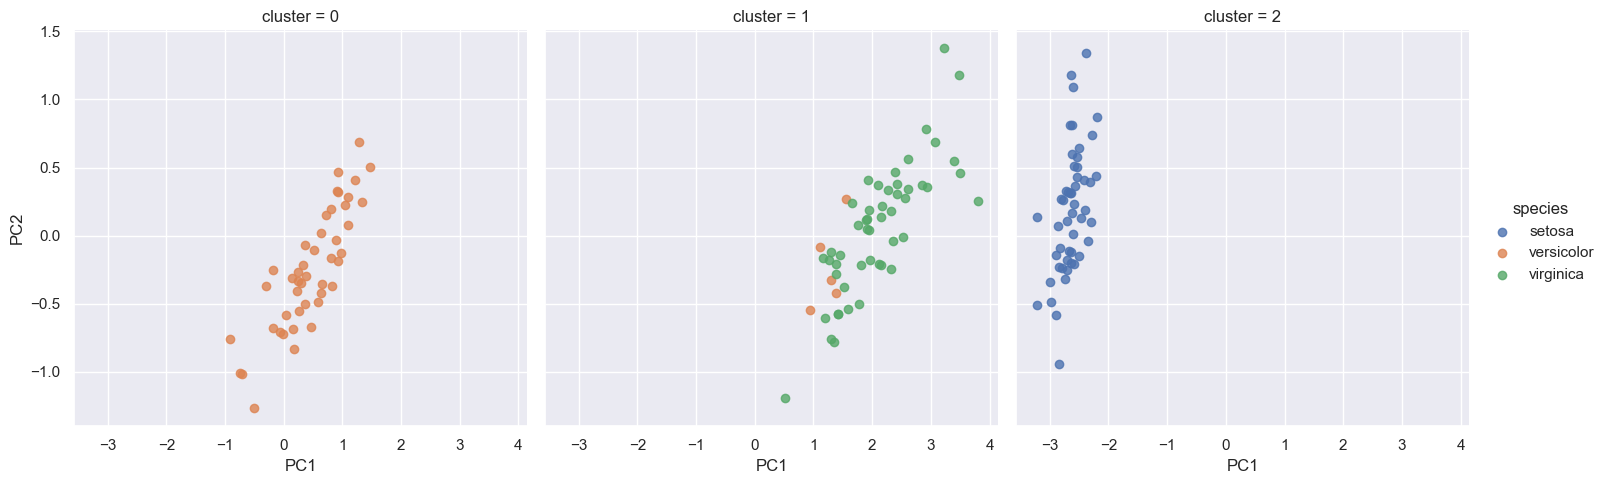

In [33]:
iris['cluster'] = y_gmm
sns.lmplot(x = "PC1", y = "PC2", data=iris, hue='species', col='cluster', fit_reg=False);

In [34]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,PC1,PC2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,2
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,2
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,2
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,2
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,2
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532,1
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317,1
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859,1
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628,1


By splitting the data by cluster number, we see exactly how well the Gaussian misture algorithm has recovered the underlying label: the **setosa** species is separated perfectly within cluster 0, while there remains a small amount of mixing between **versicolor** and **virginica**.

## Hand-written Digits Classification

This problem involves both locating and identifying characters in an image. Here we'll use Scikit-Learn's set of pre-formatted digits, which is built into the library.

### Loading and visualizing the digits data

We'll use Scikit-Learn's data access interface and take a look at this data:

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.
Let's visualize the first hundred of these:

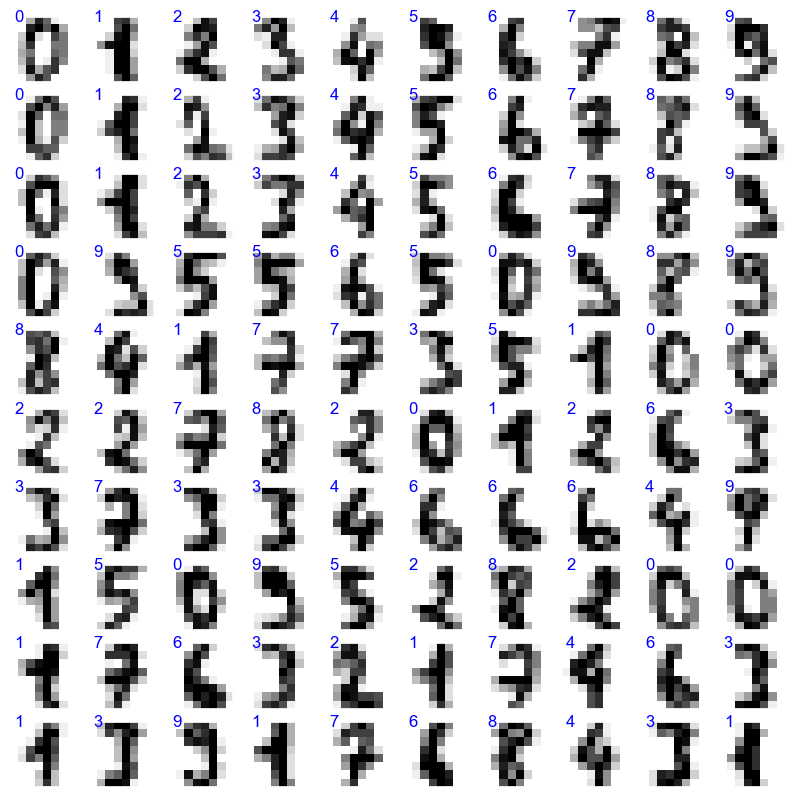

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]), color='blue')

In order to work with this data within Scikit-Learn, we need a two-dimensional, ``[n_samples, n_features]`` representation.
We can flatten out the pixel arrays so that we have a length-64 array of pixel values representing each digit.
Additionally, we need the target array, which gives the previously determined label for each digit.
These two quantities are built into the digits dataset under the ``data`` and ``target`` attributes, respectively:

In [37]:
X = digits.data
X.shape

(1797, 64)

In [38]:
y = digits.target
y.shape

(1797,)

In [39]:
y

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

We see here that there are 1,797 samples and 64 features.

### Classification on digits

Let's apply a classification algorithm to the digits.
As with the Iris data previously, we will split the data into a training and testing set, and fit a logistic regression model:

In [40]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 10000)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9533333333333334

With even this extremely simple model, we find about 95% accuracy for classification of the digits.
We can check out **where** we've gone wrong by using the **confusion matrix**, which we can compute with Scikit-Learn and plot with Seaborn:

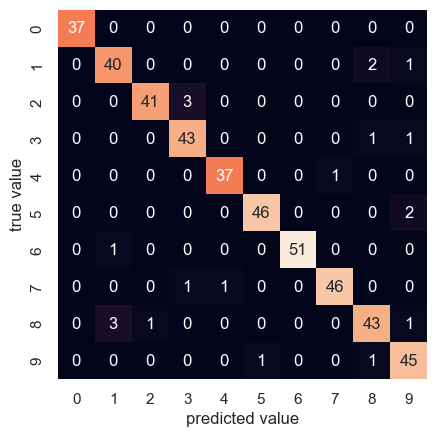

In [43]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights.
Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels.
We'll use blue for correct labels, and red for incorrect labels:

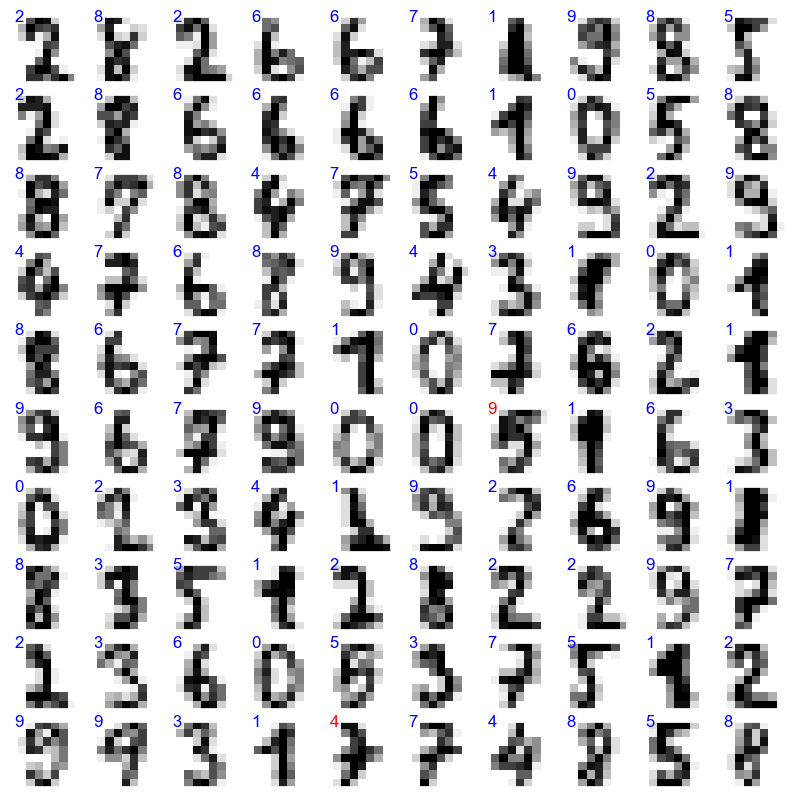

In [44]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]})

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary')
    ax.text(0.05, 0.05, str(y_model[i]),
            color='blue' if (ytest[i] == y_model[i]) else 'red')